In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Load dataset 
df = pd.read_csv('WineQT.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [5]:
# Relational Graph Function: Scatter plot with correlation between 'fixed acidity' and 'alcohol'
def relational_graph():
    """
    Creates a scatter plot to visualize the relationship between 'fixed acidity' and 'alcohol'.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(df['fixed acidity'], df['alcohol'], color='blue')
    plt.title('Relationship between Fixed Acidity and Alcohol')
    plt.xlabel('Fixed Acidity')
    plt.ylabel('Alcohol')
    plt.show()


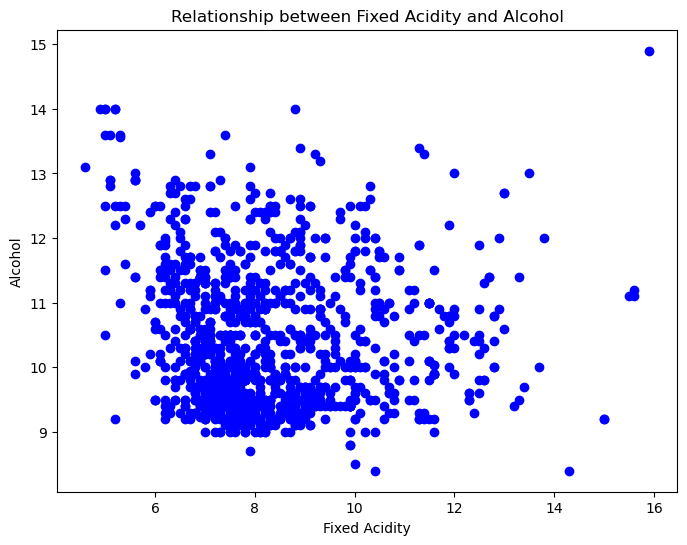

In [6]:
relational_graph() 

In [7]:
# Categorical Graph Function: Histogram to show distribution of a continuous variable
def categorical_graph():
    """
    Creates a histogram to visualize the distribution of the 'alcohol' feature.
    """
    plt.figure(figsize=(8, 6))
    sns.histplot(df['alcohol'], kde=True, color='purple')
    plt.title('Distribution of Alcohol')
    plt.xlabel('Alcohol')
    plt.ylabel('Frequency')
    plt.show()

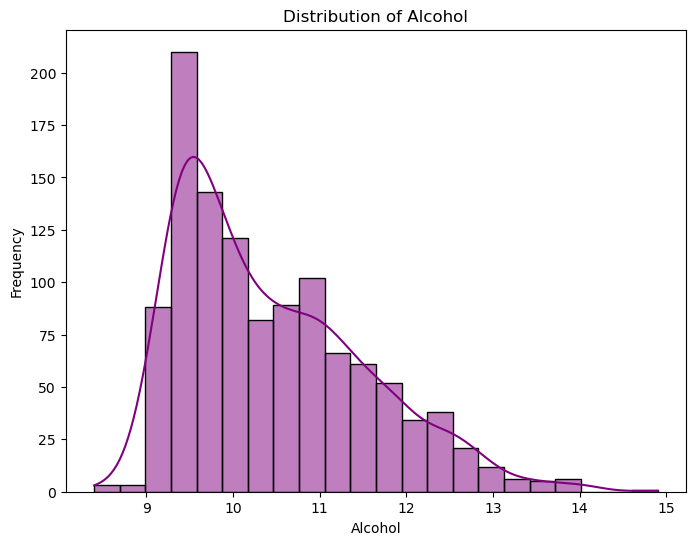

In [8]:
categorical_graph() 

In [43]:
# Statistical Graph Function: Box plot and calculating major statistics
def statistical_graph():
    """
    Creates a box plot and displays major statistical moments for the 'fixed acidity' feature.
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='fixed acidity', color='green')
    plt.title('Boxplot of Fixed Acidity')
    plt.xlabel('Fixed Acidity')
    plt.show()

    # Major Moments
    mean = df['fixed acidity'].mean()
    median = df['fixed acidity'].median()
    std_dev = df['fixed acidity'].std()
    skewness = df['fixed acidity'].skew()
    kurtosis = df['fixed acidity'].kurt()

    print("Statistics for 'fixed acidity':")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")

    # Correlation matrix
    print("\nCorrelation Matrix:")
    print(df.corr())

    # Basic describe
    print("\nBasic description of data:")
    print(df.describe())

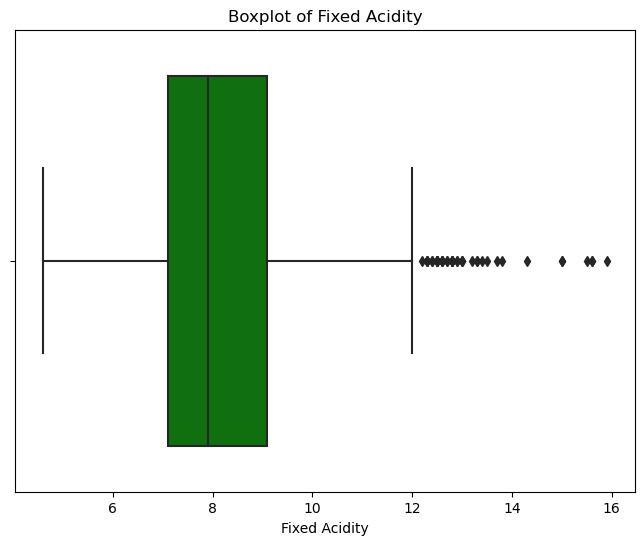

Statistics for 'fixed acidity':
Mean: 8.311111111111112
Median: 7.9
Standard Deviation: 1.747595017169539
Skewness: 1.0449299563724053
Kurtosis: 1.3846135487241824

Correlation Matrix:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -

In [44]:
statistical_graph()

In [11]:
# Elbow Plot for determining the optimal number of clusters for K-means
def elbow_plot():
    """
    Creates an elbow plot to visualize the optimal number of clusters for K-means.
    """
    features = df.drop(columns=['quality', 'Id'])
    wcss = []  # Within-cluster sum of squares

    for i in range(1, 11):  # Try clustering with 1 to 10 clusters
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(features)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(8,6))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.show()

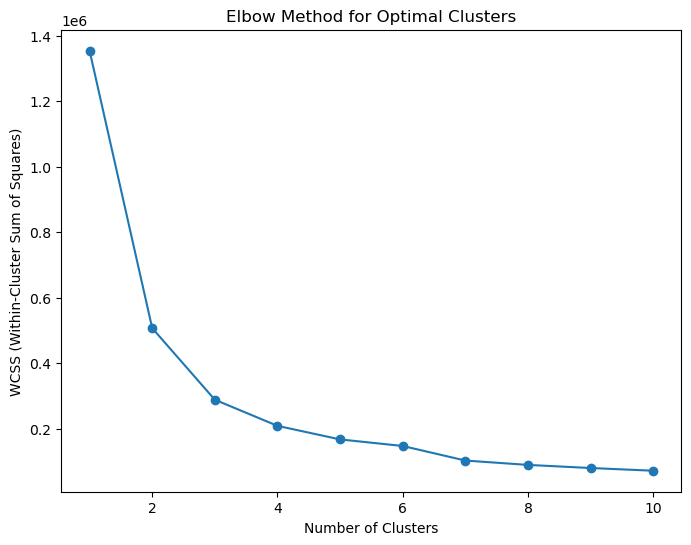

In [12]:
elbow_plot()

In [15]:
# Clustering Function: K-means clustering
def clustering_function(n_clusters=3):
    """
    Performs K-means clustering on the dataset and returns the predicted clusters.
    """
    # Use only numeric columns for clustering
    features = df.drop(columns=['quality', 'Id'])
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(features)
    df['Cluster'] = clusters
    # Print cluster centers for information
    print("Cluster Centers:\n", kmeans.cluster_centers_)
    return clusters, kmeans, df

In [16]:
clusters, kmeans, df = clustering_function(n_clusters=3)

Cluster Centers:
 [[8.23068783e+00 5.31322751e-01 2.63994709e-01 2.48373016e+00
  9.19232804e-02 2.15873016e+01 5.57526455e+01 9.96813810e-01
  3.32330688e+00 6.73412698e-01 1.03756173e+01 7.77156117e-16]
 [8.47508306e+00 5.19136213e-01 2.70132890e-01 2.40049834e+00
  8.34800664e-02 9.08471761e+00 2.26710963e+01 9.96628289e-01
  3.30828904e+00 6.50946844e-01 1.06060078e+01 1.00000000e+00]
 [7.89202454e+00 5.76441718e-01 2.71963190e-01 3.13067485e+00
  8.81104294e-02 2.58865031e+01 1.08944785e+02 9.96914172e-01
  3.29257669e+00 6.46257669e-01 9.99100204e+00 2.00000000e+00]]


In [17]:
# Visualization Function: Plot the K-means clustering result
def plot_clustering_visualization(df, kmeans):
    """
    Plots the K-means clustering result with clearly labeled and colored points.
    """
    # Extract features for 2D visualization (we'll use just the first two features for simplicity)
    x = df.iloc[:, 0].values  # First feature
    y = df.iloc[:, 1].values  # Second feature

    # Plotting the clusters
    plt.figure(figsize=(8, 6))
    
    # Scatter plot for each cluster with different colors
    plt.scatter(x, y, c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)
    
    # Marking the centroids of the clusters
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')

    # Adding labels and title
    plt.title('K-means Clustering Visualization')
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.legend()
    plt.show()


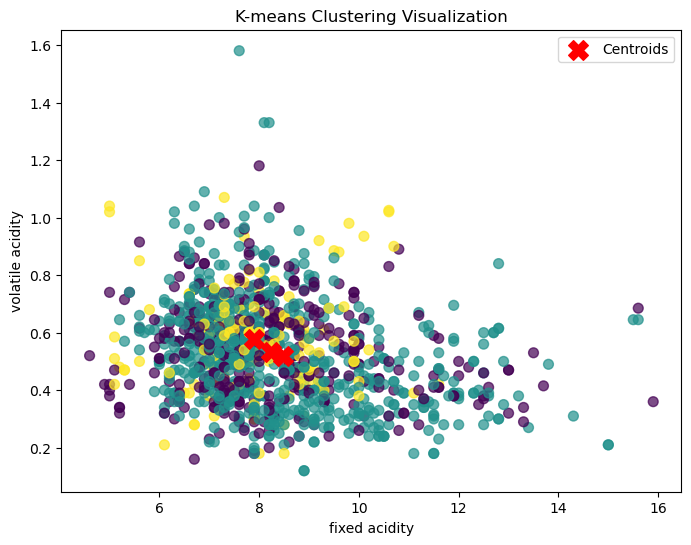

In [18]:
plot_clustering_visualization(df, kmeans)

In [32]:
# Global variables to store values for plotting
X_test_global = None
y_test_global = None
y_pred_global = None

# Function to perform linear fitting
def perform_linear_fitting():
    """
    Fits a linear regression model between selected features and the target variable.
    Also calls the plot function internally to visualize the results with confidence intervals.
    """
    global X_test_global, y_test_global, y_pred_global  # Declare globals for use in plotting

    # Prepare the data (use relevant features)
    X = df[['alcohol', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'quality']].values
    y = df['fixed acidity'].values  # Using 'fixed acidity' as the target variable

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions on test data
    y_pred = model.predict(X_test)

    # Store these values for global use in the plot function
    X_test_global = X_test
    y_test_global = y_test
    y_pred_global = y_pred

    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"R-squared: {r2}, Mean Squared Error: {mse}")

    return model, r2, mse


In [33]:
perform_linear_fitting()

R-squared: 0.5192381183244938, Mean Squared Error: 1.779620766783026


(LinearRegression(), 0.5192381183244938, 1.779620766783026)

In [36]:
# Function to plot linear regression with confidence intervals
def plot_linear_fitting_with_confidence_intervals():
    """
    Plots the linear regression results with confidence intervals and error bars.
    This function does not require parameters and uses global variables.
    """
    global X_test_global, y_test_global, y_pred_global  # Use global variables

    # Plotting the actual vs predicted values
    plt.figure(figsize=(8, 6))
    
    # Scatter plot for true values vs first feature of X_test (for example 'fixed acidity')
    plt.scatter(X_test_global[:, 0], y_test_global, color='blue', label='True values', alpha=0.6)

    # Plot the predicted values
    plt.plot(X_test_global[:, 0], y_pred_global, color='red', label='Predicted values', linewidth=2)
    
    # Adding error bars (confidence intervals) - error is the difference between actual and predicted
    y_err = np.abs(y_test_global - y_pred_global)
    plt.errorbar(X_test_global[:, 0], y_pred_global, yerr=y_err, fmt='o', color='black', alpha=0.5, label='Error bars')

    # Titles and labels
    plt.title('Linear Regression with Confidence Intervals')
    plt.xlabel('Fixed Acidity (First Feature of X)')
    plt.ylabel('Fixed Acidity')
    plt.legend()

    # Show plot
    plt.show()

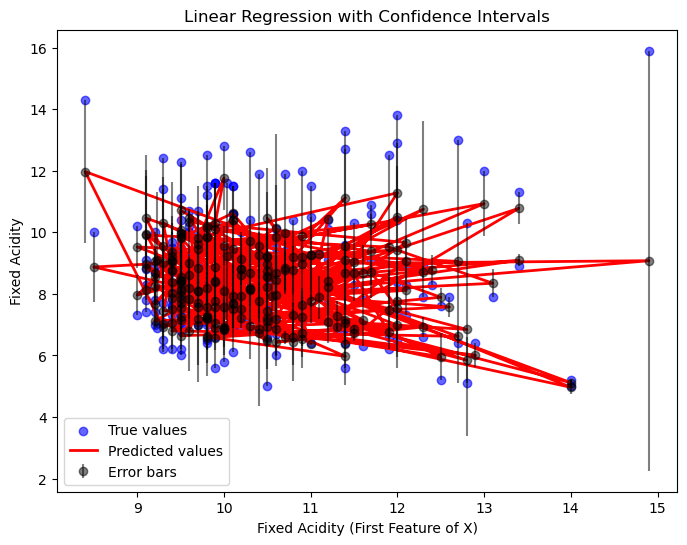

In [37]:
plot_linear_fitting_with_confidence_intervals()